# Lecture 10
### Linear Regression using numpy (with pandas and pyplot)
Notebook created by Jennifer Widom, modified by Lisa Wang.

Similar to what we did last lecture, this time with pandas. 

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### correlation ployfit

상관관계는 a의 값들 사이의 관계와 b값들 사이의 관계들이 어떤 관계를 갖는 지. 

a=(1,2,3,4) b=(23,45,77,12) 이러면 

a이의 사이 관계 를 1 이라 하고 b를 2라하면, 

그 1과 2의 관계 a와 b가 변하는 추이에 대한 관계 

변함없는 기울기로 증가하면 1

ployfit은 a와 b를 매칭한 값이 1,2  2,4  3,6 일케 이 값들이 어떻게 변하는 지

In [6]:
a = [1,2,3,4,5]
b=[2,4,6,8,10]
c = [3,-1,9,10,15]
print np.corrcoef(a,c)[0,1]
x,y = np.polyfit(a, c, 1)
print x

0.883883476483
3.5


In [12]:
# Read Cities.csv into dataframe
f = open('Cities.csv','rU') #파일로 읽음
cities = pd.read_csv(f) #판다로 엶
print type(cities)

<class 'pandas.core.frame.DataFrame'>


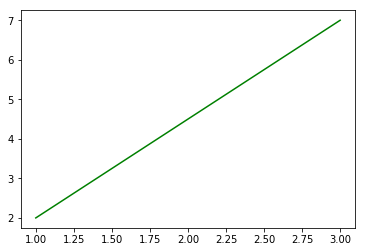

In [8]:
# Introduction to plotting a line
# Specify end points of the line: plt.plot([x_start, x_end], [y_start, y_end])
plt.plot([1,3], [2,7], color='green') #plot(x,y) x는 1에서 3
plt.show()

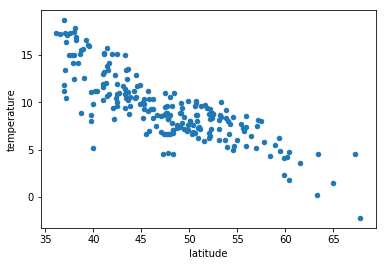

In [9]:
# Recall latitude versus temperature scatterplot
cities.plot.scatter(x='latitude', y='temperature')
plt.show()

plot함수. 뒤에 scatter같은 거 안해주면 default로 선 나옴
아니면 함수 쓰기 전에 figure 해 놓으면 scatter 이긴 함


-0.436019039989


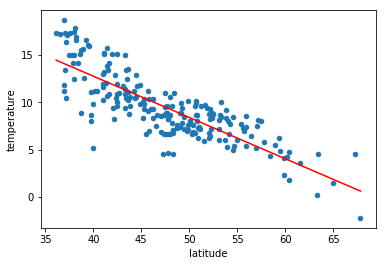

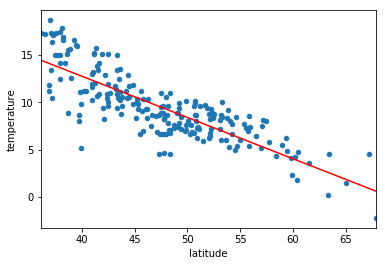

In [11]:
# Add linear regression
cities.plot.scatter(x='latitude', y='temperature') #점
a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b 
print a
#lat열과 temp열 사이에 ploy를 찾는데 1차식으로 함 a가 기울기 b가 절편
x1 = min(cities.latitude)
x2 = max(cities.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red') #선
plt.show()

#두번째 그림
# plt.xlim(x1,x2) limits x coordinate within [x1, x2]
cities.plot.scatter(x='latitude', y='temperature')
plt.xlim(x1,x2) # Beautify using plt.xlim(x1,x2) x축을 x1 x2로 제한
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

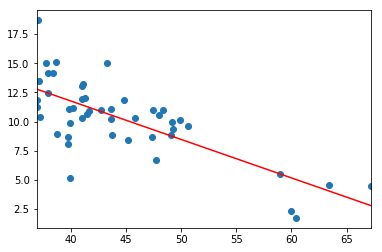

-0.329537389465


In [6]:
# Use linear regression for interactive temperature predictor 이제 예측한번 해봄
# Training data: compute latitude-temperature regression from cities
# in Norway, France, and Turkey 이거만 뽑아내서 traning data로 씀
#city는 pandas의 dataframe이라는 거라 저렇게 바로 가능
train = cities[(cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')] # |는 or
# Compute and show regression
plt.scatter(train.latitude, train.temperature)
a,b = np.polyfit(train.latitude, train.temperature, 1)
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()
print a

In [11]:
# Correlation coefficients (r values)
# Why use [1,0]? Otherwise np.corrcoef returns 2x2 matrix since it is a 2-variable case
# Refer to "https://stackoverflow.com/questions/3425439/why-does-corrcoef-return-a-matrix" for n-variable case
cc = np.corrcoef(cities.latitude, cities.temperature)[1,0] #corcoet함수는 항상 행렬을 되돌림
#cc = np.corrcoef(cities.latitude, cities.temperature) #이렇게 하면 그대로 행렬을 되돌리는데, 위어꺼는 그 안에서 값을 뽑아낸 거
print 'Correlation coefficient for latitude versus temperature:', cc
cc = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print 'Correlation coefficient for longitude versus temperature:', cc

Correlation coefficient for latitude versus temperature: -0.824104632027
Correlation coefficient for longitude versus temperature: -0.169307504036


In [10]:
# Loop asking user for city name, compute predicted + actual temperature 예측값과 실제값 둘 다 보기
# Be sure to finish this box with 'quit'
# Otherwise kernel will be in infinite loop and in busy state
# To get out manually, click kernel and select Interrupt or Restart
while True:
    name = raw_input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = cities[cities.city == name]
    if len(city) == 0:
        print 'City not in dataset'
    else:
        # Use float() to convert dataframe element to value
        print 'Predicted temperature:', a * float(city.latitude) + b
        print 'Actual temperature:', float(city.temperature)

Enter city name (or "quit" to quit): Arad
Predicted temperature: 9.72509559306
Actual temperature: 9.32
Enter city name (or "quit" to quit): Oslo
Predicted temperature: 5.19395648792
Actual temperature: 2.32
Enter city name (or "quit" to quit): quit


### <font color="green">Your Turn: World Cup Data</font>

In [12]:
# Read Players.csv into dataframe
f = open('Players.csv','rU')
players = pd.read_csv(f)

In [13]:
print players[:10]

     surname     team    position  minutes  shots  passes  tackles  saves
0     Abdoun  Algeria  midfielder       16      0       6        0      0
1    Belhadj  Algeria    defender      270      1     146        8      0
2  Boudebouz  Algeria  midfielder       74      3      28        1      0
3  Bougherra  Algeria    defender      270      1      89       11      0
4   Chaouchi  Algeria  goalkeeper       90      0      17        0      2
5   Djebbour  Algeria     forward      123      3      19        1      0
6    Ghezzal  Algeria     forward       40      3       8        0      0
7  Guedioura  Algeria  midfielder       38      0      18        1      0
8   Halliche  Algeria    defender      270      2      94        4      0
9      Kadir  Algeria  midfielder      262      0     104        3      0


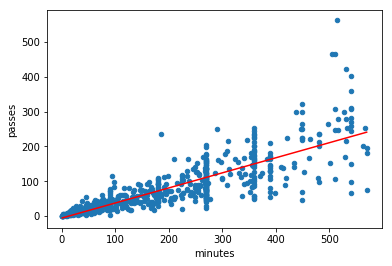

In [14]:
# From the players data, compute and plot a linear regression for
# minutes played (x-axis) versus passes made (y-axis).
# Reminder: copy-paste-modify approach to programming!
players.plot.scatter(x='minutes', y='passes')
a,b = np.polyfit(players.minutes, players.passes, 1) # Regression line is y = ax + b
x1 = min(players.minutes)
x2 = max(players.minutes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [15]:
# Show the correlation coefficient for the minutes-passes regression.
cc = np.corrcoef(players.minutes, players.passes)[0,1]
print 'Correlation coefficient for minutes versus passes:', cc
# Also show correlation coefficients for minutes played versus
# tackles, minutes played versus shots, and minutes played versus saves
cc = np.corrcoef(players.minutes, players.tackles)[0,1]
print 'Correlation coefficient for minutes versus tackles:', cc
cc = np.corrcoef(players.minutes, players.shots)[0,1]
print 'Correlation coefficient for minutes versus shots:', cc
cc = np.corrcoef(players.minutes, players.saves)[0,1]
print 'Correlation coefficient for minutes versus saves:', cc

Correlation coefficient for minutes versus passes: 0.815119315795
Correlation coefficient for minutes versus tackles: 0.610673461384
Correlation coefficient for minutes versus shots: 0.407923077405
Correlation coefficient for minutes versus saves: 0.228477232531


In [16]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal
train = players[(players.team=='Greece') | (players.team=='USA') | (players.team=='Portugal')]
a,b = np.polyfit(train.minutes, train.passes, 1)
while True:
    name = raw_input('Enter player name (or "quit" to quit): ')
    if name == 'quit': break
    player = players[players.surname == name]
    if len(player) == 0:
        print 'Player not in dataset'
    else:
        # Use float() to convert dataframe element to value
        print 'Predicted number of passes:', a * float(player.minutes) + b
        print 'Actual number of passes:', int(player.passes)

Enter player name (or "quit" to quit): Kadir
Predicted number of passes: 95.4123156473
Actual number of passes: 104
Enter player name (or "quit" to quit): quit


In [17]:
# SUPER BONUS!!
# Repeat previous but use separate predictor for the four different positions
# (goalkeeper,defender,midfielder,forward). Does it do better?
# Try comparing correlation coefficients against one regression for all players.
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string
train_gk = players[(players.position=='goalkeeper')]
a_gk,b_gk = np.polyfit(train_gk.minutes, train_gk.passes, 1)
train_df = players[(players.position=='defender')]
a_df,b_df = np.polyfit(train_df.minutes, train_df.passes, 1)
train_mf = players[(players.position=='midfielder')]
a_mf,b_mf = np.polyfit(train_mf.minutes, train_mf.passes, 1)
train_fw = players[(players.position=='forward')]
a_fw,b_fw = np.polyfit(train_fw.minutes, train_fw.passes, 1)
while True:
    name = raw_input('Enter player name (or "quit" to quit): ')
    if name == 'quit': break
    player = players[players.surname == name]
    if len(player) == 0:
        print 'Player not in dataset'
    elif player.iloc[0].position == 'goalkeeper':
        # Use float() to convert dataframe element to value
        print 'Predicted number of passes:', a_gk * float(player.minutes) + b_gk
        print 'Actual number of passes:', int(player.passes)
    elif player.iloc[0].position == 'defender':
        # Use float() to convert dataframe element to value
        print 'Predicted number of passes:', a_df * float(player.minutes) + b_df
        print 'Actual number of passes:', int(player.passes)
    elif player.iloc[0].position == 'midfielder':
        # Use float() to convert dataframe element to value
        print 'Predicted number of passes:', a_mf * float(player.minutes) + b_mf
        print 'Actual number of passes:', int(player.passes)
    elif player.iloc[0].position == 'forward':
        # Use float() to convert dataframe element to value
        print 'Predicted number of passes:', a_fw * float(player.minutes) + b_fw
        print 'Actual number of passes:', int(player.passes)

Enter player name (or "quit" to quit): Kadir
Predicted number of passes: 132.546723145
Actual number of passes: 104
Enter player name (or "quit" to quit): quit


In [18]:
cc = np.corrcoef(players.minutes, players.passes)[0,1]
print 'Correlation coefficient for minutes versus passes(single regression):', cc
cc = np.corrcoef(train_gk.minutes, train_gk.passes)[0,1]
print 'Correlation coefficient for minutes versus passes(goalkeeper):', cc
cc = np.corrcoef(train_df.minutes, train_df.passes)[0,1]
print 'Correlation coefficient for minutes versus passes(defender):', cc
cc = np.corrcoef(train_mf.minutes, train_mf.passes)[0,1]
print 'Correlation coefficient for minutes versus passes(midfielder):', cc
cc = np.corrcoef(train_fw.minutes, train_fw.passes)[0,1]
print 'Correlation coefficient for minutes versus passes(forward):', cc

Correlation coefficient for minutes versus passes(single regression): 0.815119315795
Correlation coefficient for minutes versus passes(goalkeeper): 0.801681164135
Correlation coefficient for minutes versus passes(defender): 0.891885240439
Correlation coefficient for minutes versus passes(midfielder): 0.865429580684
Correlation coefficient for minutes versus passes(forward): 0.887887951328
